In [3]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [4]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

from time import time
from keras.callbacks import TensorBoard


if not data_augmentation:
    print('Not using data augmentation.')
    tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs, callbacks=[tensor_board],
              steps_per_epoch=100,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), callbacks=[tensor_board],
                        epochs=epochs, steps_per_epoch=100,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
100/100 [==============================] - 9s 88ms/step - loss: 2.2951 - acc: 0.1269 - val_loss: 2.2643 - val_acc: 0.1820
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 2.1802 - acc: 0.1869 - val_loss: 2.1148 - val_acc: 0.1992
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 2.0706 - acc: 0.2253 - val_loss: 2.0316 - val_acc: 0.2482
Epoch 4/100
100/100 [==============================] - 9s 86ms/step - loss: 2.0301 - acc: 0.2569 - val_loss: 1.9592 - val_acc: 0.3244
Epoch 5/100
100/100 [==============================] - 9s 87ms/step - loss: 1.9696 - acc: 0.2909 - val_loss: 1.9257 - val_acc: 0.3219
Epoch 6/100
100/100 [==============================] - 9s 87ms/step - loss: 1.9301 - acc: 0.3034 - val_loss: 1.8515 - val_acc: 0.3603
Epoch 7/100
100/100 [==============================] - 9s 87ms/step - loss: 1.8547 - acc

Epoch 61/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3303 - acc: 0.5325 - val_loss: 1.2134 - val_acc: 0.5716
Epoch 62/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3370 - acc: 0.5250 - val_loss: 1.2180 - val_acc: 0.5708
Epoch 63/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3098 - acc: 0.5491 - val_loss: 1.2239 - val_acc: 0.5659
Epoch 64/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3320 - acc: 0.5203 - val_loss: 1.1747 - val_acc: 0.5834
Epoch 65/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3437 - acc: 0.5231 - val_loss: 1.3079 - val_acc: 0.5376
Epoch 66/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3620 - acc: 0.5175 - val_loss: 1.2218 - val_acc: 0.5691
Epoch 67/100
100/100 [==============================] - 9s 87ms/step - loss: 1.3542 - acc: 0.5091 - val_loss: 1.2231 - val_acc: 0.5631
Epoch 68/100
100/100 [==============================] -

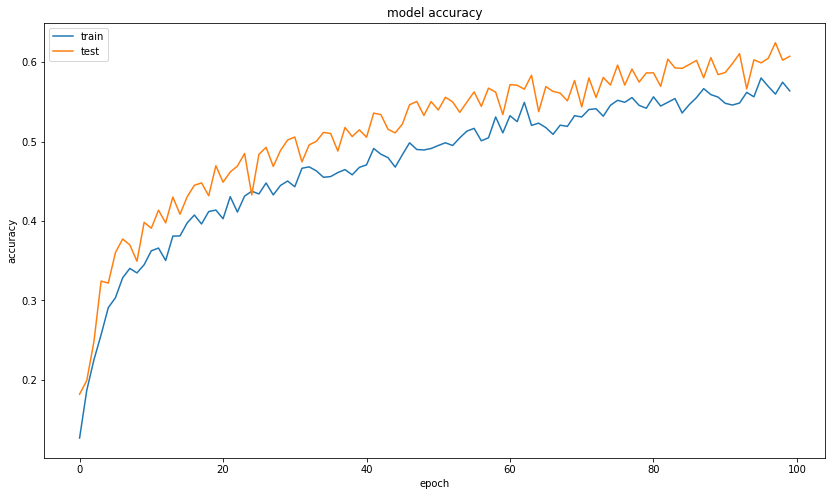

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy

plt.figure(figsize=(14,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

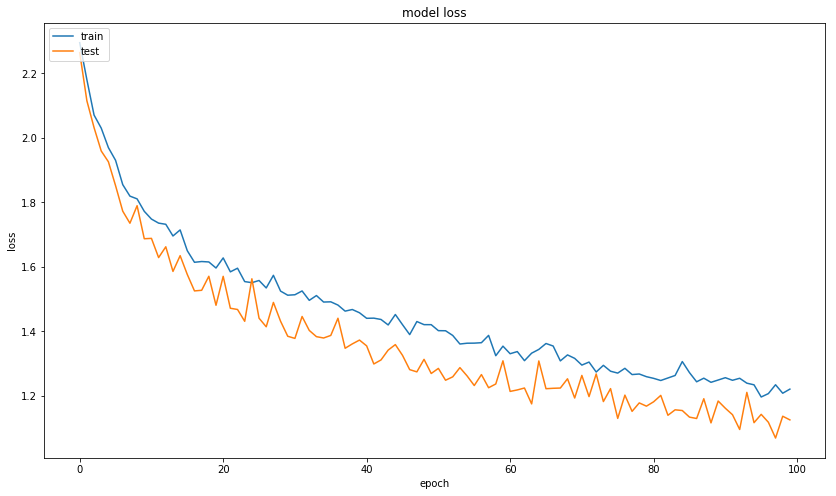

In [9]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('cat_dog_train_board.h5')